In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
#coordonnée de la personne 1
x1 = 30
y1 = 50
pos1 = np.array((x1,y1))

x2 = 15
y2 = 60
pos2 = np.array((x2,y2))

#coordonnée de sortie
sx1 = 0
sy1 = 0
sx2 = 30
sy2 = 0
sortie1 = np.array((sx1,sy1))
sortie2 = np.array((sx2,sy2))
sortie = np.array((sortie1,sortie2))


#vitesse de mouvement de la personne
v = 1.5 #m/s

#temps
dt = 1
tmax = 10

In [3]:
#testtttttttttttttt

def generer_people(nb,x_max,y_max):
    people = []
    for i in range(nb):
        x = random.randint(0,x_max)
        y = random.randint(0,y_max)
        position = np.array((x,y))
        people.append(position)
    return people

print(generer_people(10,60,60))

def positions_individu(pos,sortie,v,dt,t_max):
    p = pos
    res = [p]
    t = 0
    while (t<t_max):
        step = step(p,sortie,v,dt)
        p = p + step
        res.append(p)
        t = t + dt
    return res

[array([21, 40]), array([34, 14]), array([13, 25]), array([38, 52]), array([13, 43]), array([59, 57]), array([41, 33]), array([39, 57]), array([ 0, 26]), array([30, 59])]


In [4]:
def direction(pos,sortie):
    d = sortie - pos
    d = d/np.sqrt(d[0]**2+d[1]**2)
    return d


def sortiePlusProche(pos,sortie):
    d = np.linalg.norm(sortie - pos, axis=1)
    return np.argmin(d)
        
s_pos1 = sortiePlusProche(pos1,sortie)
s_pos2 = sortiePlusProche(pos2,sortie)


def step(pos,sorties,v,dt): 
    sortie = sortiePlusProche(pos,sorties)
    dir = direction(pos,sortie)
    return v*dt*dir
    

def generer_people(nb,x_max,y_max):
    people = np.zeros((nb,2))
    for i in range(nb):
        x = random.randint(0,x_max)
        y = random.randint(0,y_max)
        people[i, 0] = x
        people[i, 1] = y
    return people
#x_max, y_max = dimension de l'espace



def step_people(people,sortie,v,dt,t_max):
    res = [people]
    t = 0
    while (t<t_max):
        new_people = res[-1].copy()
        for i in range(len(people)):
            new_people[i] = new_people[i] + step(new_people[i],sortie,v,dt)
        res.append(new_people)
        t = t + dt
    return res

In [31]:
nb_pers = 5
x_max = 60
y_max = 60
people = generer_people(nb_pers,x_max,y_max)
liste_step = step_people(people,sortie,v,dt,tmax)
#print(people)
print(liste_step)

def plot_xy(liste_step):
    pos_x = []
    pos_y = []
    res_x = []
    for i in range(len(liste_step)):
        for j in range(len(liste_step[i])):
            pos_x.append(liste_step[i][j][0])
            pos_y.append(liste_step[i][j][1])
    return np.array((pos_x,pos_y))

plot = plot_xy(liste_step)
print(plot)

[array([[22., 49.],
       [14.,  0.],
       [55., 53.],
       [42., 51.],
       [22., 15.]]), array([[21.39877175, 47.625764  ],
       [12.5       ,  0.        ],
       [53.91951968, 51.95953747],
       [41.04888062, 49.84009831],
       [20.75192456, 14.16794971]]), array([[20.7975435 , 46.251528  ],
       [11.        ,  0.        ],
       [52.83903936, 50.91907494],
       [40.09776124, 48.68019663],
       [19.50384912, 13.33589941]]), array([[20.19631525, 44.87729199],
       [ 9.5       ,  0.        ],
       [51.75855904, 49.87861241],
       [39.14664185, 47.52029494],
       [18.25577368, 12.50384912]]), array([[19.595087  , 43.50305599],
       [ 8.        ,  0.        ],
       [50.67807872, 48.83814988],
       [38.19552247, 46.36039326],
       [17.00769823, 11.67179882]]), array([[18.99385874, 42.12881999],
       [ 6.5       ,  0.        ],
       [49.5975984 , 47.79768735],
       [37.24440309, 45.20049157],
       [15.75962279, 10.83974853]]), array([[18.392630

In [ ]:
plt.plot()

In [ ]:
position_x1 = [i[0] for i in positions_individu(pos1,sortie[s_pos1],v,dt,tmax)]
position_y1 = [i[1] for i in positions_individu(pos1,sortie[s_pos1],v,dt,tmax)]
position_x2 = [i[0] for i in positions_individu(pos2,sortie[s_pos2],v,dt,tmax)]
position_y2 = [i[1] for i in positions_individu(pos2,sortie[s_pos2],v,dt,tmax)]

print(positions_individu(pos1,sortie[s_pos1],v,dt,tmax))

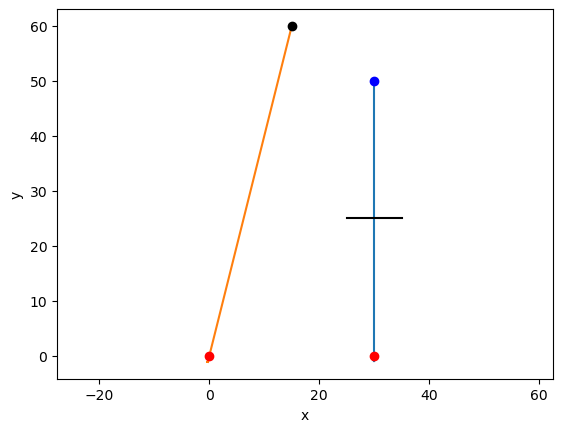

In [7]:
plt.plot(position_x1,position_y1)
plt.plot(position_x2,position_y2)
plt.xlabel("x")
plt.ylabel("y")

#individu
plt.plot(x1,y1,"bo")
plt.plot(x2,y2,"ko")
#sortie
plt.plot(sortie[0][0],sortie[0][1],"ro")
plt.plot(sortie[1][0],sortie[1][1],"ro")
#obstacle
plt.plot(obs_x,obs_y,"k-")

plt.axis("equal")
plt.show()

In [4]:
#obstacle
obs_a = np.array((25,25)) 
obs_b = np.array((35,25))

def positions_obstacle(point_a,point_b,delta_d):
    #ensemble des points d'un obstacle
    #delta_d = distance entre chaque points
    point = point_a
    l_obs = [point]
    dir = direction(point_a,point_b)
    
    d_max = point_b- point_a
    d_max = np.sqrt(d_max[0]**2+d_max[1]**2)
    d = 0
    
    while (d < d_max):
        point = point + dir * delta_d
        l_obs.append(point)
        d = d + delta_d
    return l_obs

obstacle = positions_obstacle(obs_a,obs_b,0.1) #liste des coord des points d'un obstacle
obs_x = [i[0] for i in obstacle]
obs_y = [i[1] for i in obstacle]
print(obstacle)

[array([25, 25]), array([25.1, 25. ]), array([25.2, 25. ]), array([25.3, 25. ]), array([25.4, 25. ]), array([25.5, 25. ]), array([25.6, 25. ]), array([25.7, 25. ]), array([25.8, 25. ]), array([25.9, 25. ]), array([26., 25.]), array([26.1, 25. ]), array([26.2, 25. ]), array([26.3, 25. ]), array([26.4, 25. ]), array([26.5, 25. ]), array([26.6, 25. ]), array([26.7, 25. ]), array([26.8, 25. ]), array([26.9, 25. ]), array([27., 25.]), array([27.1, 25. ]), array([27.2, 25. ]), array([27.3, 25. ]), array([27.4, 25. ]), array([27.5, 25. ]), array([27.6, 25. ]), array([27.7, 25. ]), array([27.8, 25. ]), array([27.9, 25. ]), array([28., 25.]), array([28.1, 25. ]), array([28.2, 25. ]), array([28.3, 25. ]), array([28.4, 25. ]), array([28.5, 25. ]), array([28.6, 25. ]), array([28.7, 25. ]), array([28.8, 25. ]), array([28.9, 25. ]), array([29., 25.]), array([29.1, 25. ]), array([29.2, 25. ]), array([29.3, 25. ]), array([29.4, 25. ]), array([29.5, 25. ]), array([29.6, 25. ]), array([29.7, 25. ]), arr

In [5]:
directions = np.array(((1,0),(-1,0),(0,1),(0,-1)))
coord = np.array((20,30))
coord2 = coord+v*dt*directions[0]
print(coord)
print(coord2)

[20 30]
[21.5 30. ]


In [6]:
def deplace_vers(coord,obstacle,v,dt):
    #coord : coord actuel de la personne
    #obstacle : liste des points
    liste_direction = np.array(((1,0),(-1,0),(0,1),(0,-1))) #droite,gauche,hau,bas
    for i in liste_direction:
        p = coord + v*dt*i #le prochain coord de la personne
        if p not in obstacle :
            return p


coord = np.array((20,30))
print(coord+v*dt*directions[0])
deplace_vers(coord,obstacle,v,dt)
        

def positions_individu(pos,sortie,obstacle,v,dt,t_max):
    res = []
    t = 0
    p = pos
    while (t<t_max):
        step = step(p,sortie,v,dt)
        p = p + step
        if p not in obstacle:
            res.append(p)
        else:
            p = deplace_vers(p,obstacle,v,dt)
        t = t + dt
    return res

[21.5 30. ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()